In [13]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [14]:
params = {
    "set1": {"mode": "TRAIN", "modelName": "m16", "folderName": "2024-01-05-06-02-14"}
}

param = "set1"

In [15]:
modelName = params[param]["modelName"]
mode = params[param]["mode"]
folderName = params[param]["folderName"]

In [16]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [17]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderPath = os.path.join(outputFolderPath, folderName)
data_pickle, data_json = read_data(folderPath)

X_pred = data_pickle["X_pred"]
X_true = data_pickle["X_true"]
tArrayPred = data_pickle["tArrayPred"]
mseArray = data_pickle["mseArray"]
dx = data_json["s2"]["dx"]
L = data_json["s2"]["L"]

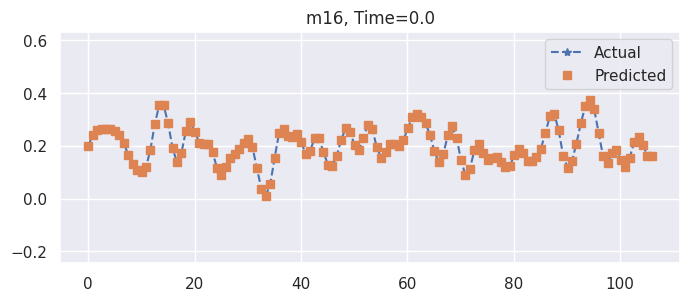

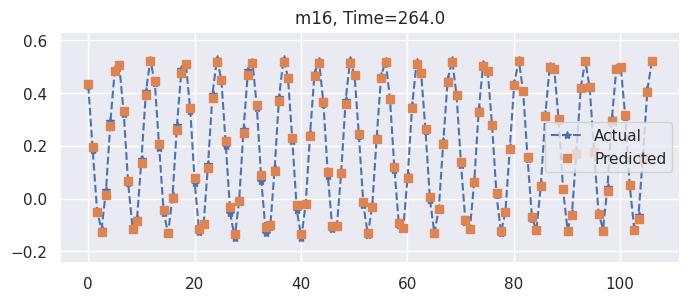

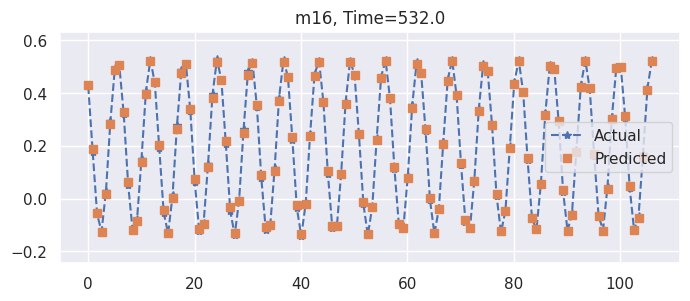

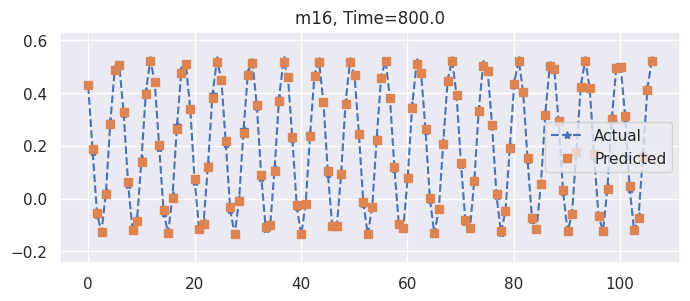

In [18]:
sns.set_theme()
filenamePrefix = 'profile'

minV = X_true[-1,:].min()
maxV = X_true[-1,:].max()
minV = minV - abs(maxV) * 0.2
maxV = maxV + abs(maxV) * 0.2
xp = np.arange(0,L,dx)


nFig = 4
idxTSample = np.floor(np.linspace(0,tArrayPred.shape[0]-1, nFig)).astype(int)
for t in idxTSample:
    tTime = tArrayPred[t]
    fig, ax = plt.subplots(figsize=(8,3))
    ax.plot(xp, X_true[t,:], '*--', label='Actual')
    ax.plot(xp, X_pred[t,:],'s', label='Predicted')
    ax.set_title(f'{modelName}, Time={tTime}')
    ax.set_ylim([minV,maxV])
    plt.legend()
    # tTimeFmt = f'{tTime:2.1f}'.replace(".","_")
    # filename = f'{filenamePrefix}-{modelName}-t{tTimeFmt}.png'
    # filePath = os.path.join(os.getcwd(), 'o5_visualize', filename)
    # filepath = os.path.join(os.getcwd(), "o5_visualize", filename)
    # plt.savefig(filepath, dpi=300, bbox_inches="tight")